In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [29]:
df = pd.read_csv('UEFA_CL_Player_stats.csv')

In [30]:
print(df.columns.tolist())

['gols', 'assistências', 'passes precisos', 'desarmes', 'interceptações', 'dribles bem-sucedidos', 'Finalizações no alvo', 'Minutos jogados', 'avaliação']


RMSE: 0.43
R²: 0.98


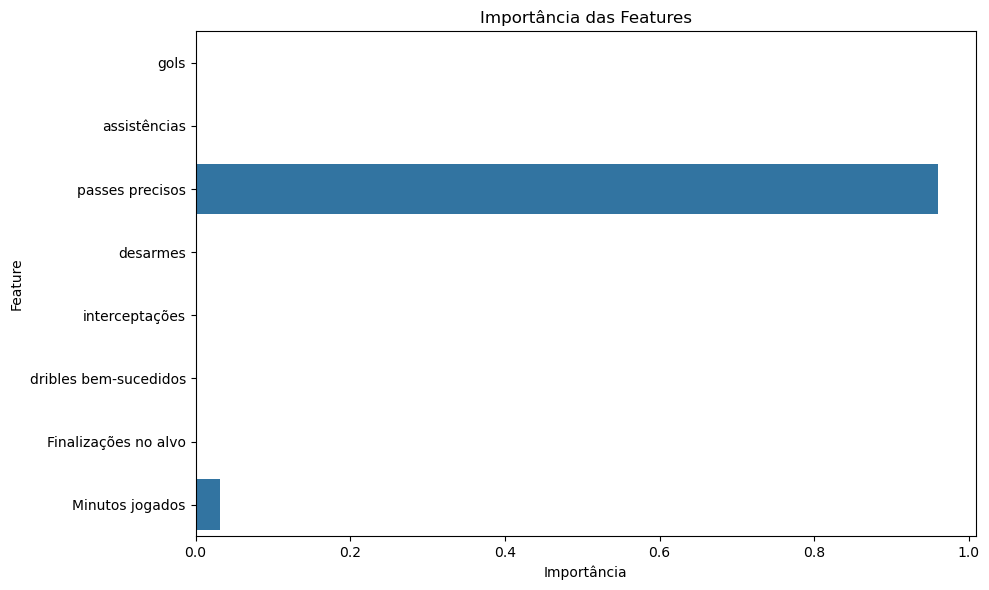

Avaliação prevista: 7.712078554778552


In [31]:
features = [
    'gols', 'assistências', 'passes precisos', 'desarmes',
    'interceptações', 'dribles bem-sucedidos', 'Finalizações no alvo',
    'Minutos jogados'
]

# Remover valores ausentes
df_modelo = df[features + ['avaliação']].dropna()
X = df_modelo[features]
y = df_modelo['avaliação']

# ==============================
# 2. Treino/teste split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# 3. Pipeline de produção
# ==============================

preprocessador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), features)
])

pipeline = Pipeline(steps=[
    ('preprocessador', preprocessador),
    ('modelo', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Treinar pipeline
pipeline.fit(X_train, y_train)

# ==============================
# 4. Avaliação
# ==============================

y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

# ==============================
# 5. Importância das features
# ==============================

importances = pipeline.named_steps['modelo'].feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Importância das Features")
plt.xlabel("Importância")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ==============================
# 6. Exportar modelo treinado
# ==============================

joblib.dump(pipeline, 'pipeline_avaliacao.pkl')

# ==============================
# 7. Predição em novo jogador (exemplo)
# ==============================

novo = pd.DataFrame([{
    'gols': 3,
    'assistências': 1,
    'passes precisos': 80,
    'desarmes': 5,
    'interceptações': 3,
    'dribles bem-sucedidos': 2,
    'Finalizações no alvo': 4,
    'Minutos jogados': 90
}])

pipeline_carregado = joblib.load('pipeline_avaliacao.pkl')
print("Avaliação prevista:", pipeline_carregado.predict(novo)[0])
